# Sharpe ratio
- Represents both the risk, and return 
- https://www.investopedia.com/terms/s/sharperatio.asp
- Developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk.

Formula

$SR = \frac{R_p - R_f}{\sigma_p}$
- $SR$: Sharpe ratio
- $R_p$: return of portfolio
- $R_f$: risk free return
- $\sigma_p$: standard deviation of portfolio

Goal is to get high $SR$. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
tickers = ["FB", "NVDA", "AMZN", "HP", "AAPL"]

df_list = []
for ticker in tickers:
    df = pd.read_csv("ticker-" + ticker.lower() + ".csv", index_col=0, parse_dates=True)
    df_list.append(df['Adj Close'])

data = pd.concat(df_list, axis=1)
data.columns = tickers

In [6]:
portfolio = np.array([.2, .15, .30, .1, .25])

In [8]:
data = data/data.iloc[0]

In [10]:
data['Log return'] = np.sum(np.log(data/data.shift())*portfolio, axis=1)

In [11]:
data.head()

,FB,NVDA,AMZN,HP,AAPL,Log return
Date,,,,,,
2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2018-01-03,1.017914,1.065814,1.012775,1.004591,0.999826,0.017335
2018-01-04,1.016040,1.071432,1.017308,1.016067,1.004470,0.004054
2018-01-05,1.029931,1.080511,1.033751,1.020658,1.015906,0.012072
2018-01-08,1.037813,1.113619,1.048662,1.049273,1.012133,0.012183


<IPython.core.display.Javascript object>


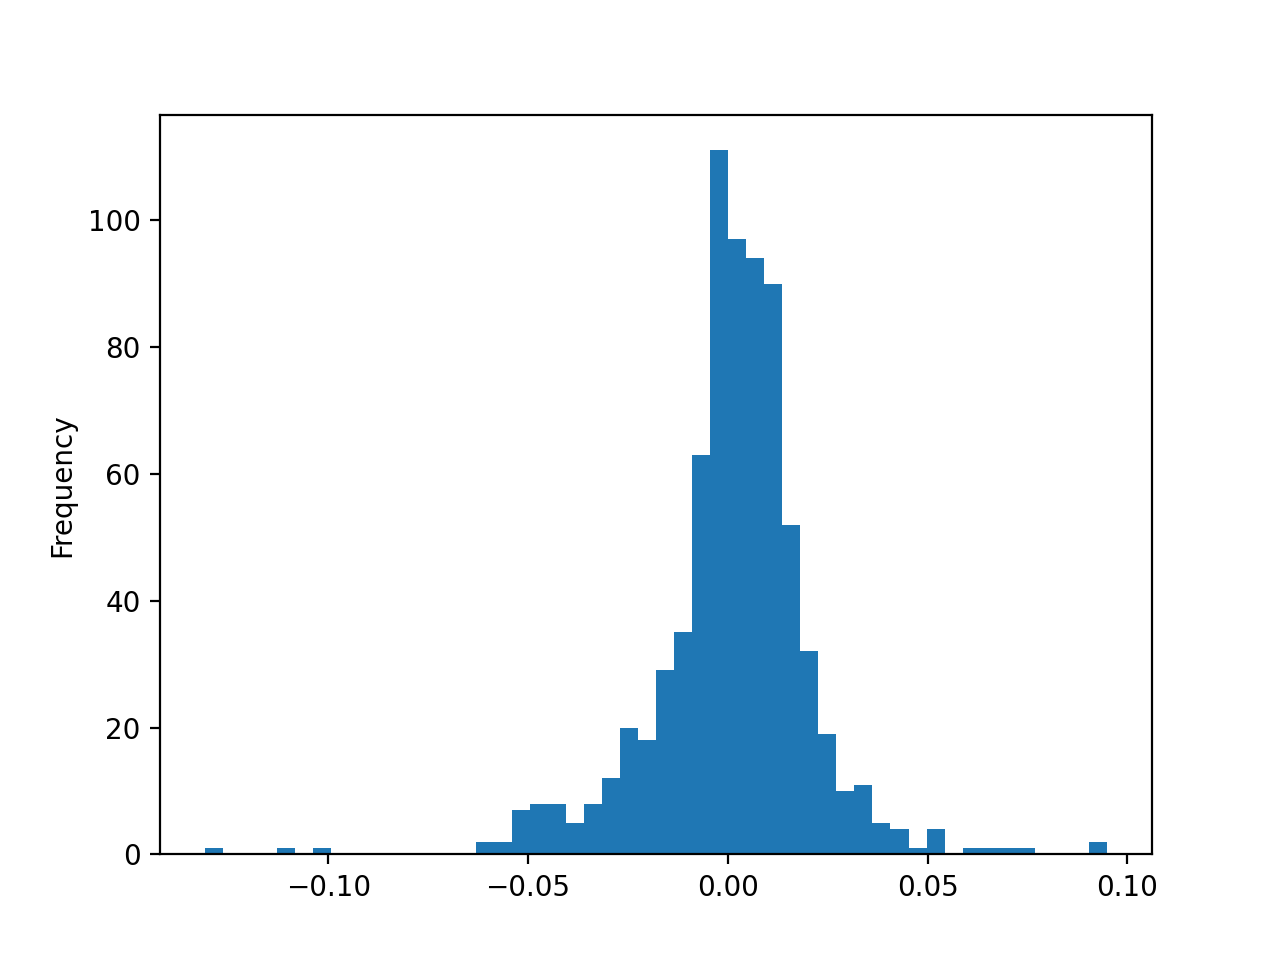

<AxesSubplot:ylabel='Frequency'>

In [13]:
fig, ax = plt.subplots()
data['Log return'].plot(kind='hist', bins=50, ax=ax)

In [14]:
SR = data['Log return'].mean()/data['Log return'].std()

In [15]:
SR

0.048450619817771

In [16]:
ASR = SR*252**0.5

In [17]:
ASR

0.7691297454285579

In [18]:
(data['Log return'].mean()*252)/(data['Log return'].std()*252**.5)

0.7691297454285579